Importing Necessary Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection And Processing

In [10]:
#Loading The CSV Data To A Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

#Printing First 5 Rows Of The DF
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
#Printing Last 5 Rows Of The DF
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
#Number Of Rows And Columns
gold_data.shape

(2290, 6)

In [13]:
#Getting Some Basic Info About The Data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
#Checking The Number Of Missing Values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
#Getting The Statistical Measures Of The Data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation

In [17]:
correlation = gold_data.corr()

<AxesSubplot:>

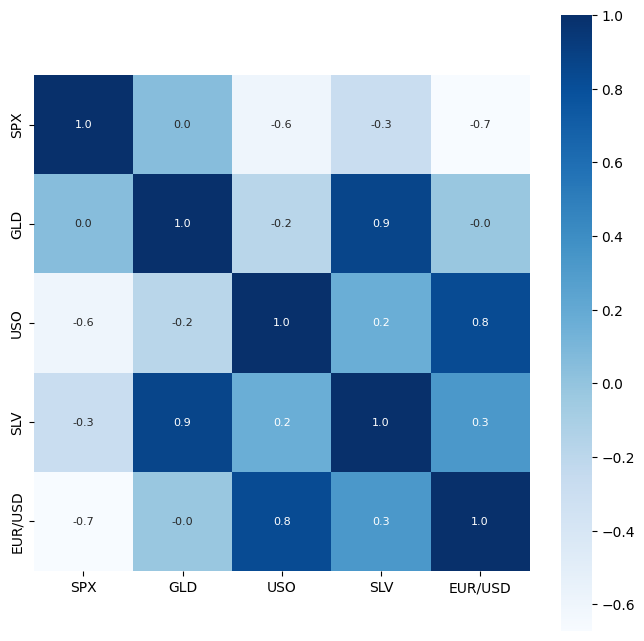

In [19]:
#Constructing A Heatmap To Understand The Correlaton
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
#Correlation Values Of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


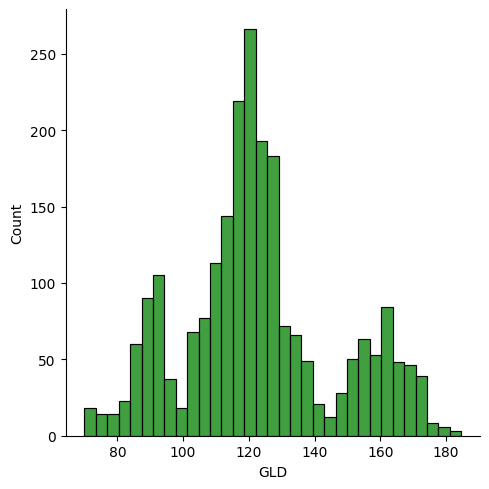

In [26]:
#Checking The Distribution Of The GLD Price
sns.displot(gold_data['GLD'], color='green')

Splitting The Features And Target

In [28]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']
print(X.shape, Y.shape)

(2290, 4) (2290,)


Splitting Into Training And Testing Data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [31]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1832, 4) (1832,) (458, 4) (458,)


In [38]:
print(Y_train)

2280    124.589996
1730    103.849998
418     110.820000
979     157.119995
223      88.529999
           ...    
960     154.470001
905     167.509995
1096    163.169998
235      90.209999
1061    167.990005
Name: GLD, Length: 1832, dtype: float64


Model Training


Random Forest Regressor

In [32]:
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
#Training The Model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

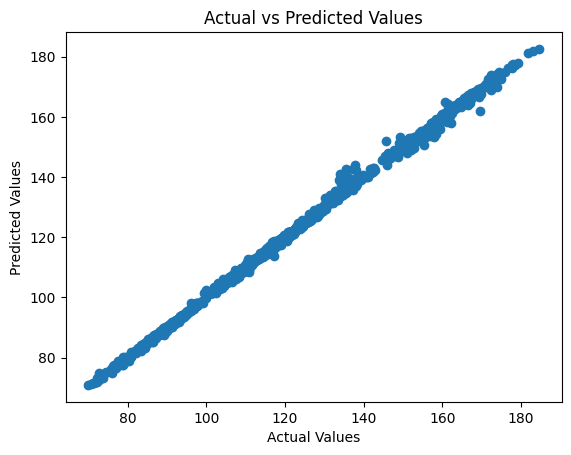

In [56]:
#Prediction For Training Data
training_data_prediction = regressor.predict(X_train)
# print(training_data_prediction)

#Visualizing The Relation Between Y_train And training_data_prediction
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

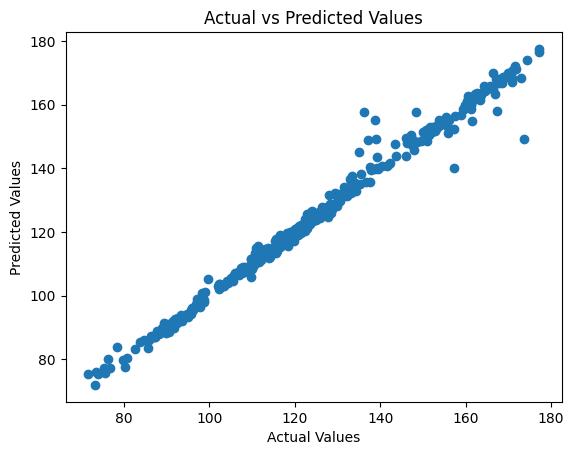

In [55]:
#Prediction For Testing Data
testing_data_prediction = regressor.predict(X_test)
# print(testing_data_prediction)

#Comparing Y_test And testing_data_prediction
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [54]:
#R Squared Error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print(f"R Squared Error: {error_score}")

R Squared Error: 0.9873090912426133


Compare Actual Values And Predicted Values In A Plot


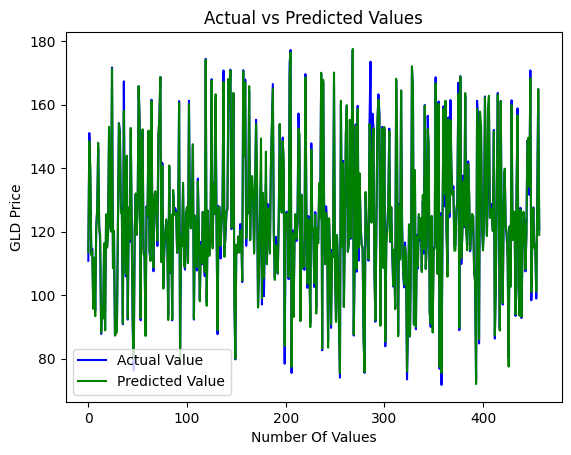

In [57]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(testing_data_prediction, color='green', label='Predicted Value')
plt.xlabel('Number Of Values')
plt.ylabel('GLD Price')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()